In [1]:
!wget https://statso.io/wp-content/uploads/2023/01/user-behaviour.zip

--2023-04-11 11:11:47--  https://statso.io/wp-content/uploads/2023/01/user-behaviour.zip
Resolving statso.io (statso.io)... 192.0.78.25, 192.0.78.24
Connecting to statso.io (statso.io)|192.0.78.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13034 (13K) [application/zip]
Saving to: ‘user-behaviour.zip’

user-behaviour.zip  100%[===================>]  12.73K  --.-KB/s    in 0s      

2023-04-11 11:11:47 (32.2 MB/s) - ‘user-behaviour.zip’ saved [13034/13034]



In [2]:
!unzip user-behaviour.zip

Archive:  user-behaviour.zip
   creating: user behaviour/
  inflating: user behaviour/userbehaviour.csv  
  inflating: __MACOSX/user behaviour/._userbehaviour.csv  


In [3]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
pio.templates.default = "plotly_white"

data = pd.read_csv("/content/user behaviour/userbehaviour.csv")

In [4]:
data

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed
...,...,...,...,...,...,...,...,...
994,1995,38.0,938.0,0,5,4,1865,Installed
995,1996,43.0,61.0,0,6,8,1327,Installed
996,1997,47.0,761.0,0,6,1,1936,Installed
997,1998,6.0,73.0,1,5,1,3436,Installed


In [5]:
print(f'Average Screen Time = {data["Average Screen Time"].mean()}')
print(f'Highest Screen Time = {data["Average Screen Time"].max()}')
print(f'Lowest Screen Time = {data["Average Screen Time"].min()}')

Average Screen Time = 24.39039039039039
Highest Screen Time = 50.0
Lowest Screen Time = 0.0


In [6]:
print(f'Average Spend of the Users = {data["Average Spent on App (INR)"].mean()}')
print(f'Highest Spend of the Users = {data["Average Spent on App (INR)"].max()}')
print(f'Lowest Spend of the Users = {data["Average Spent on App (INR)"].min()}')

Average Spend of the Users = 424.4154154154154
Highest Spend of the Users = 998.0
Lowest Spend of the Users = 0.0


In [7]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Average Spent on App (INR)", 
                    size="Average Spent on App (INR)", 
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
figure.show()

In [8]:
figure = px.scatter(data_frame = data, 
                    x="Average Screen Time",
                    y="Ratings", 
                    size="Ratings", 
                    color= "Status", 
                    title = "Relationship Between Ratings and Screentime",
                    trendline="ols")
figure.show()

# Clustering

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
   
from sklearn.cluster import KMeans

In [24]:
clustering_data = data[["Average Screen Time", "Left Review", 
                        "Ratings", "Last Visited Minutes", 
                        "Average Spent on App (INR)", 
                        "New Password Request"]]

mm_scaler = MinMaxScaler()

clustering_data1 = mm_scaler.fit_transform(X=clustering_data)

For n_clusters = 2 The average silhouette_score is : 0.4255361406356983
For n_clusters = 3 The average silhouette_score is : 0.40604793859160987
For n_clusters = 4 The average silhouette_score is : 0.43644253273209976
For n_clusters = 5 The average silhouette_score is : 0.3671332057921813
For n_clusters = 6 The average silhouette_score is : 0.29897078103649244


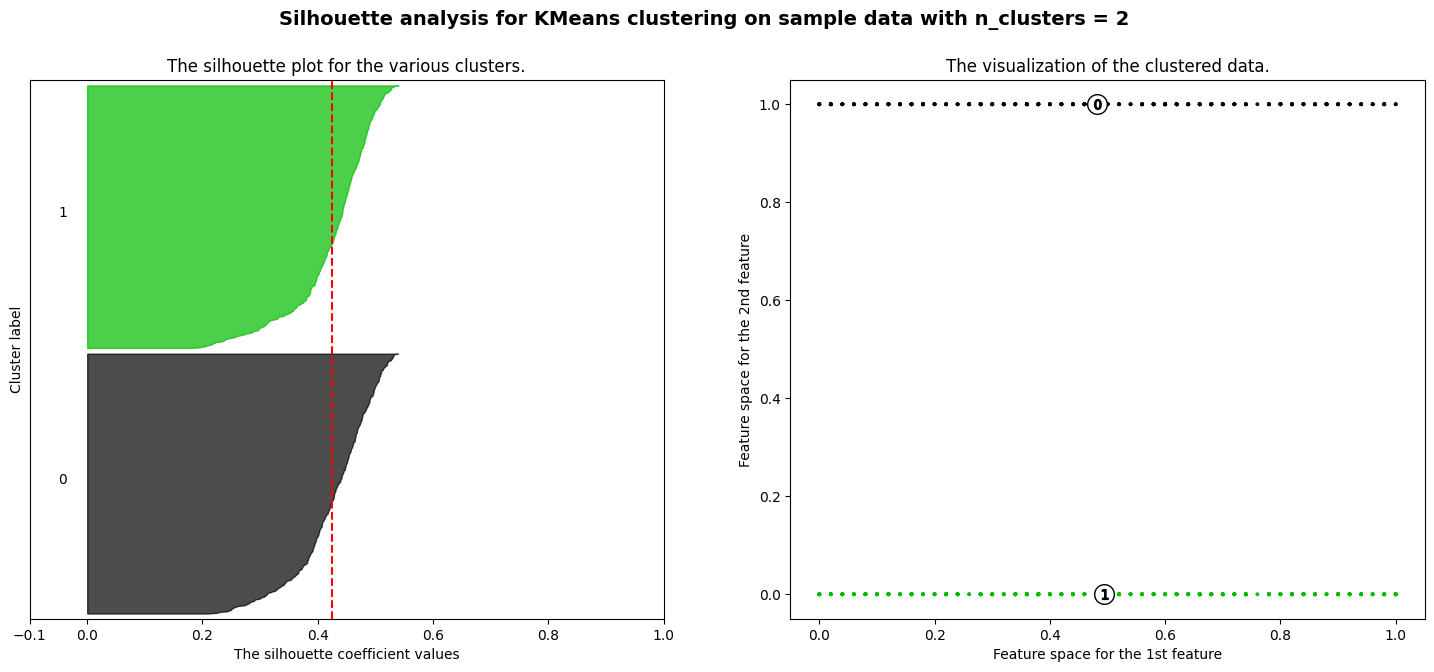

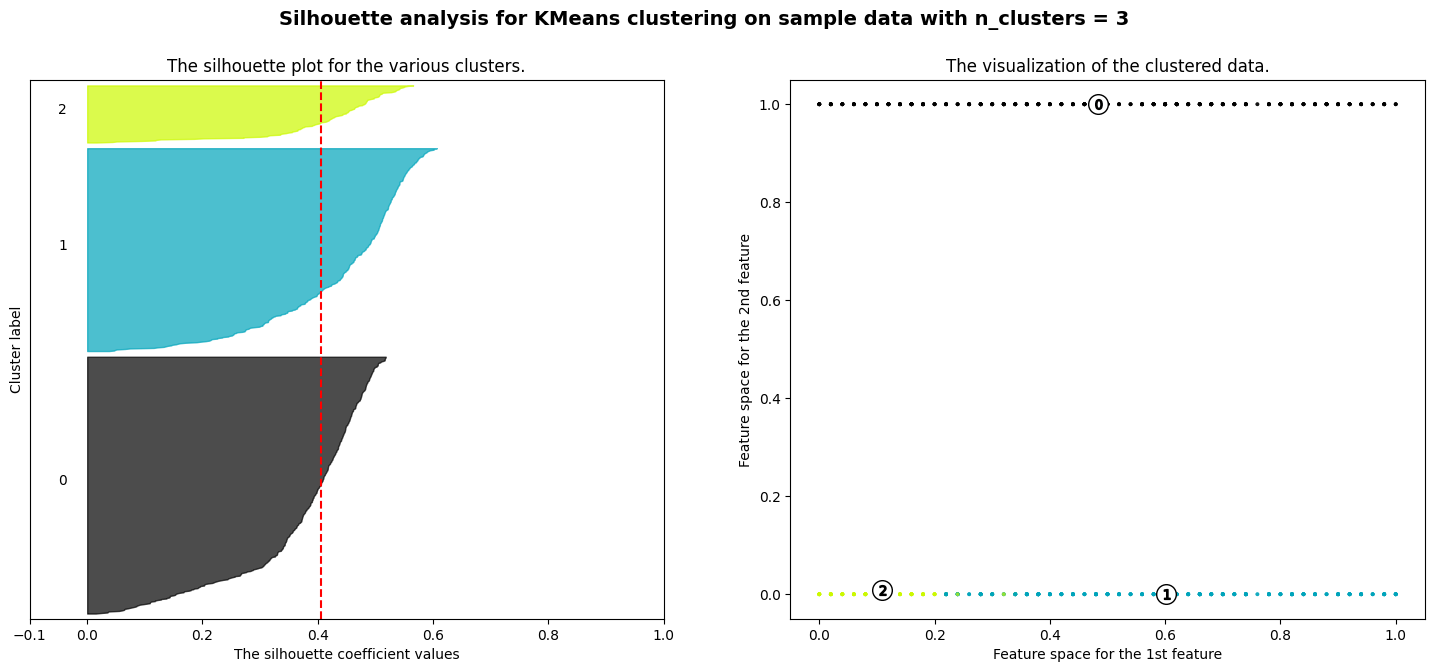

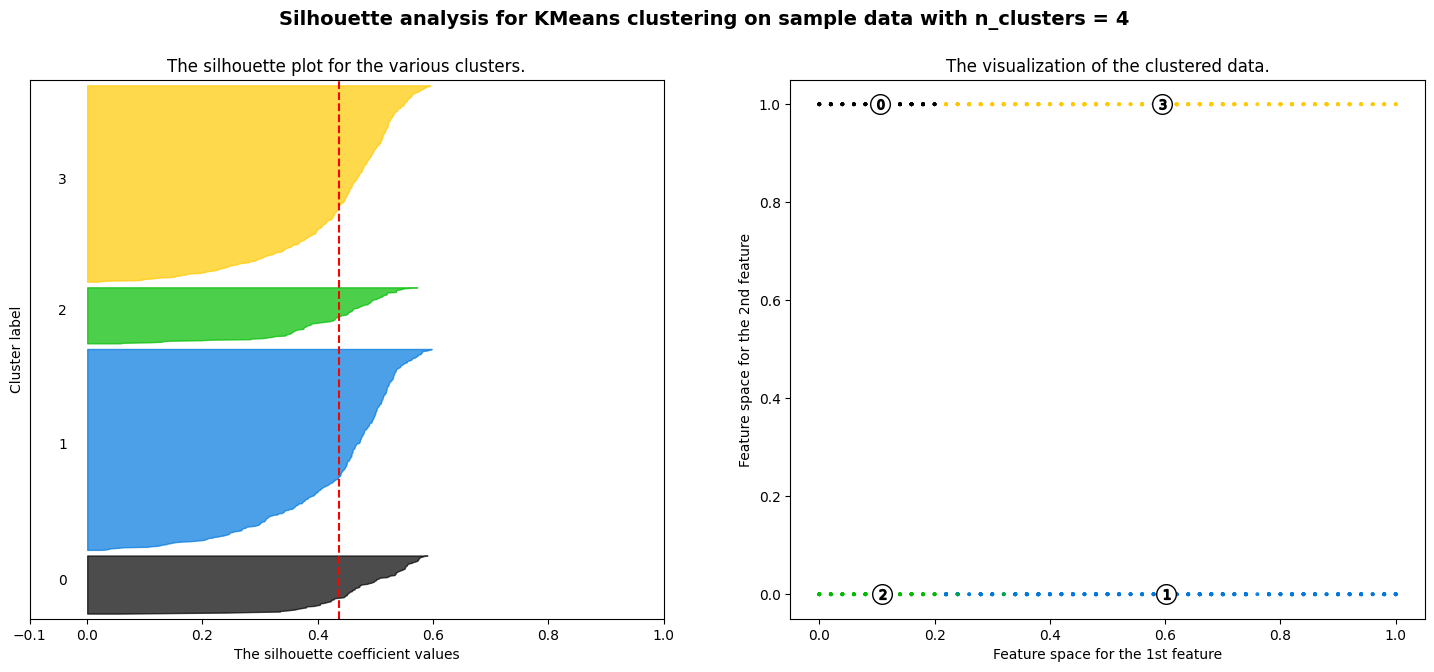

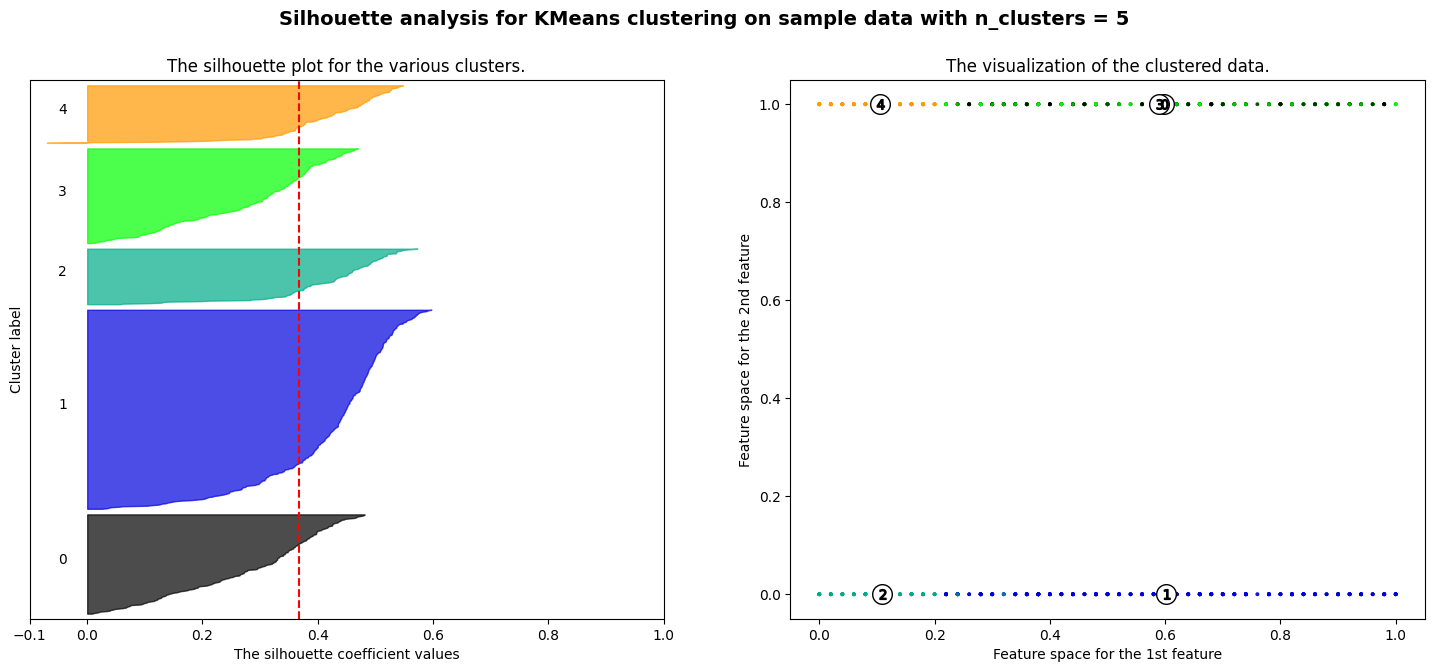

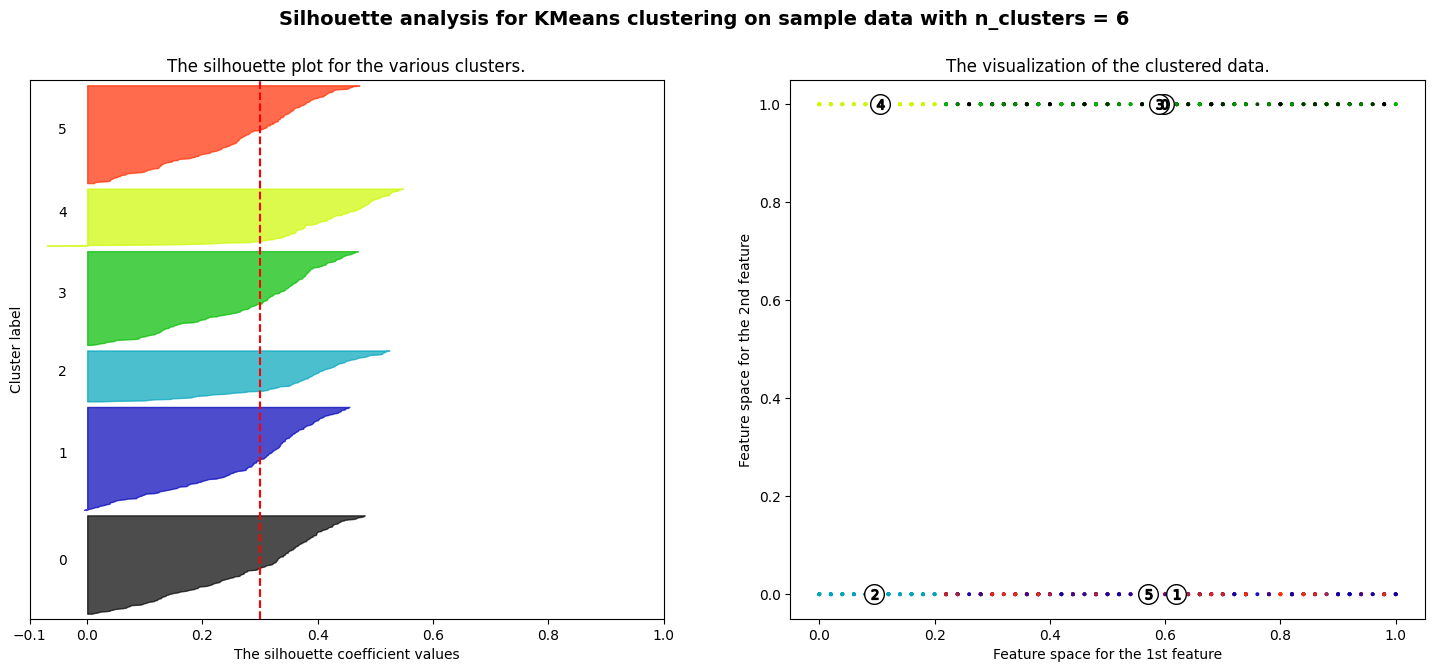

In [37]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(clustering_data1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(clustering_data1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clustering_data1, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clustering_data1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        clustering_data1[:, 0], clustering_data1[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

1 : 0.7390112269852589
2 : 0.5253839842447041
3 : 0.4630958393144464
4 : 0.4093605357994528
5 : 0.3814407084163506
6 : 0.35460226996100325
7 : 0.34064316698364877
8 : 0.32471028310696165
9 : 0.3112170517353304


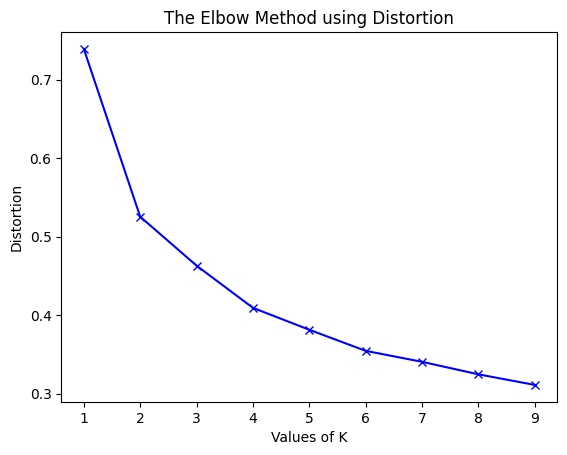

In [47]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(clustering_data1)
    kmeanModel.fit(clustering_data1)
  
    distortions.append(sum(np.min(cdist(clustering_data1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / clustering_data1.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(clustering_data1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / clustering_data1.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [57]:
std_scaler = StandardScaler()
clustering_data2 = std_scaler.fit_transform(X=clustering_data)

In [58]:
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(clustering_data2)
data["Segments"] = clusters

In [59]:
data.head(10)

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2
2,1003,37.0,207.0,0,8,5,971,Installed,1
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0
5,1006,28.0,599.0,0,9,4,2878,Installed,1
6,1007,49.0,887.0,1,9,6,4481,Installed,0
7,1008,8.0,31.0,0,2,1,1715,Installed,2
8,1009,28.0,741.0,1,8,2,801,Installed,0
9,1010,28.0,524.0,1,8,4,4621,Installed,0


In [60]:
data["Segments"].value_counts()

1    403
0    387
2    209
Name: Segments, dtype: int64

In [61]:
kmeans = KMeans(n_clusters=3, n_init=10)
clusters = kmeans.fit_predict(clustering_data1)
data["Segments"] = clusters

In [62]:
data["Segments"].value_counts()

1    402
0    386
2    211
Name: Segments, dtype: int64

In [63]:
data["Segments"] = data["Segments"].map({0: "Retained", 1: 
    "Churn", 2: "Needs Attention"})

In [64]:
PLOT = go.Figure()
for i in list(data["Segments"].unique()):
    

    PLOT.add_trace(go.Scatter(x = data[data["Segments"]== i]['Last Visited Minutes'],
                                y = data[data["Segments"] == i]['Average Spent on App (INR)'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Last Visited Minutes: %{x} <br>Average Spent on App (INR): %{y}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   yaxis_title = 'Average Spent on App (INR)',
                   xaxis_title = 'Last Visited Minutes',
                   scene = dict(xaxis=dict(title = 'Last Visited Minutes', titlefont_color = 'black'),
                                yaxis=dict(title = 'Average Spent on App (INR)', titlefont_color = 'black')))